In [1]:
!pip install feature-engine

In [2]:
import polars as pl
from utils import *
import seaborn as sns

In [3]:
save_dir = 'lio_problem'
create_directory_if_not_exist(save_dir)

In [4]:
sample_size = 250 #times dimention
problem_dim = 5

In [5]:
sample_file_norm_dummy = f'{save_dir}/dummy/*.parquet'
sample_file_norm_ela = f'{save_dir}/ela/*.parquet'

In [6]:
features_dummy = pl.scan_parquet(sample_file_norm_dummy).filter(pl.col('instance')<=500).sort(['problem', 'instance']).collect()
features_ela = pl.scan_parquet(sample_file_norm_ela).filter(pl.col('instance')<=500).sort(['problem', 'instance']).collect()

In [7]:
features_dummy

s_3.0__t_power13__a_quantile_75,s_5.0__t_power12__a_quantile_75,s_3.0__t_cos__a_std,s_3.0__t_power16__a_std,s_5.0__t_power12__a_quantile_25,s_5.0__t_power16__a_quantile_05,s_1.0__t_cos__a_quantile_25,s_2.0__t_cos__a_quantile_25,s_1.0__t_sin__a_quantile_25,s_9.0__t_power2__a_quantile_75,s_7.0__t_sin__a_std,s_9.0__t_power13__a_quantile_25,s_0.5__t_power13__a_quantile_95,s_0.7__t_sin__a_std,s_1.0__t_power16__a_quantile_95,s_1.0__t_sin__a_quantile_95,s_0.3__t_power13__a_mean,s_0.3__t_cos__a_mean,s_9.0__t_power12__a_median,s_0.7__t_power13__a_quantile_95,s_5.0__t_log1p__a_std,s_0.2__t_power13__a_median,s_5.0__t_power13__a_median,s_2.0__t_power2__a_median,s_0.7__t_power2__a_quantile_75,s_0.3__t_cos__a_quantile_25,s_0.3__t_cos__a_quantile_05,s_0.7__t_power2__a_quantile_95,s_5.0__t_power2__a_quantile_95,s_7.0__t_power2__a_quantile_75,s_0.3__t_log1p__a_quantile_75,s_5.0__t_cos__a_mean,s_7.0__t_power12__a_quantile_95,s_0.2__t_sin__a_quantile_95,s_7.0__t_sin__a_quantile_25,s_0.5__t_sin__a_std,s_1.0__t_cos__a_quantile_95,…,s_2.0__t_power13__a_std,s_0.2__t_cos__a_quantile_05,s_0.7__t_power12__a_std,s_0.5__t_sin__a_quantile_05,s_3.0__t_cos__a_quantile_25,s_0.7__t_sin__a_quantile_95,s_1.0__t_sin__a_mean,s_0.3__t_power2__a_quantile_75,s_0.3__t_power13__a_std,s_1.0__t_power16__a_std,s_7.0__t_power12__a_median,s_2.0__t_sin__a_quantile_95,s_0.5__t_power2__a_quantile_05,s_2.0__t_sin__a_mean,s_0.2__t_power2__a_quantile_25,s_1.0__t_power16__a_median,s_5.0__t_log1p__a_quantile_75,s_0.7__t_power13__a_quantile_75,s_0.5__t_power16__a_quantile_25,s_0.7__t_cos__a_std,s_9.0__t_power2__a_quantile_05,s_5.0__t_log1p__a_quantile_95,s_0.3__t_sin__a_mean,s_9.0__t_sin__a_quantile_05,s_5.0__t_sin__a_quantile_05,s_3.0__t_sin__a_quantile_05,s_1.0__t_power12__a_median,s_7.0__t_power12__a_mean,s_9.0__t_power13__a_mean,s_1.0__t_cos__a_mean,s_7.0__t_cos__a_std,s_0.2__t_power16__a_std,s_0.3__t_power12__a_mean,s_2.0__t_power2__a_quantile_25,s_5.0__t_sin__a_quantile_95,problem,instance
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
1.159583,1.612045,0.493335,0.105178,1.089853,0.891468,0.867949,0.506672,0.235328,21.88034,0.692254,1.288258,0.716479,0.130882,0.950109,0.671031,0.471741,0.991492,1.822234,0.801517,0.350174,0.419436,1.226437,0.544493,0.132363,0.987869,0.975749,0.265141,13.527616,13.236255,0.144898,-0.175785,2.269182,0.146589,-0.415634,0.095955,0.994966,…,0.172655,0.989197,0.139874,0.050171,0.011582,0.492464,0.37074,0.024311,0.091737,0.08758,1.60706,0.991778,0.002519,0.645209,0.002257,0.846891,1.28057,0.713884,0.701115,0.041826,0.816228,1.542869,0.115975,-0.988322,-0.511042,0.290392,0.607411,1.587968,1.465808,0.907952,0.622102,0.066974,0.328741,0.225732,0.997898,1,1
1.142823,1.577223,0.454711,0.103531,1.100363,0.881666,0.878766,0.544459,0.2398,20.050139,0.667921,1.296527,0.702231,0.122467,0.940615,0.638525,0.468281,0.992082,1.821048,0.785578,0.336958,0.419254,1.225905,0.543075,0.121291,0.988882,0.978492,0.235037,11.991698,12.129096,0.139116,-0.175572,2.201832,0.138074,-0.308207,0.089585,0.995591,…,0.16759,0.990422,0.134154,0.046953,0.078137,0.466037,0.362287,0.022278,0.089045,0.086209,1.606013,0.978686,0.002206,0.638842,0.002346,0.846707,1.249223,0.703566,0.703362,0.037387,0.714819,1.495799,0.112884,-0.984775,-0.31581,0.271556,0.607016,1.569672,1.455059,0.914091,0.610149,0.065926,0.324953,0.234566,0.99871,1,2
1.115457,1.52091,0.431581,0.104389,1.039643,0.862385,0.894879,0.601619,0.214492,17.33655,0.640573,1.248381,0.69133,0.118279,0.933285,0.613768,0.453826,0.993223,1.723056,0.773383,0.334853,0.404075,1.181523,0.435284,0.104875,0.990384,0.980413,0.213977,10.917216,10.487542,0.129966,-0.069111,2.15076,0.13178,-0.079507,0.086311,0.996617,…,0.167434,0.991279,0.132717,0.041124,0.181875,0.446256,0.333562,0.019263,0.088962

In [8]:
features_ela

cm_angle.dist_ctr2best_mean,cm_angle.dist_ctr2best_sd,cm_angle.dist_ctr2worst_mean,cm_angle.dist_ctr2worst_sd,cm_angle.angle_mean,cm_angle.angle_sd,cm_angle.y_ratio_best2worst_mean,cm_angle.y_ratio_best2worst_sd,cm_angle.costs_runtime,cm_conv.convex.hard,cm_conv.concave.hard,cm_conv.convex.soft,cm_conv.concave.soft,cm_conv.costs_runtime,cm_grad.mean,cm_grad.sd,cm_grad.costs_runtime,disp.ratio_mean_02,disp.ratio_mean_05,disp.ratio_mean_10,disp.ratio_mean_25,disp.ratio_median_02,disp.ratio_median_05,disp.ratio_median_10,disp.ratio_median_25,disp.diff_mean_02,disp.diff_mean_05,disp.diff_mean_10,disp.diff_mean_25,disp.diff_median_02,disp.diff_median_05,disp.diff_median_10,disp.diff_median_25,disp.costs_runtime,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,…,ela_meta.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,limo.avg_length,limo.avg_length_norm,limo.length_mean,limo.length_sd,limo.cor,limo.cor_norm,limo.ratio_mean,limo.ratio_sd,limo.sd_ratio_reg,limo.sd_ratio_norm,limo.sd_mean_reg,limo.sd_mean_norm,limo.costs_runtime,nbc.nn_nb.sd_ratio,nbc.nn_nb.mean_ratio,nbc.nn_nb.cor,nbc.dist_ratio.coeff_var,nbc.nb_fitness.cor,nbc.costs_runtime,pca.expl_var.cov_x,pca.expl_var.cor_x,pca.expl_var.cov_init,pca.expl_var.cor_init,pca.expl_var_PC1.cov_x,pca.expl_var_PC1.cor_x,pca.expl_var_PC1.cov_init,pca.expl_var_PC1.cor_init,pca.costs_runtime,problem,instance
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
2.121802,0.442655,2.259992,0.418296,100.968807,27.326911,0.212286,0.108682,1.23916,0.3828125,0.20625,0.684375,0.315625,1.031201,0.614563,0.137381,0.784259,0.417693,0.505216,0.582725,0.723268,0.410958,0.506103,0.584351,0.72394,-5.120076,-4.350507,-3.668996,-2.43323,-5.213842,-4.371679,-3.679073,-2.443513,0.077065,0.405368,-0.410456,1.0,…,0.067524,0.817571,-0.955956,0.022047,-1.456456,0.49359,0.758641,0.043613,NaN,0.101111,0.082045,0.017219,NaN,NaN,NaN,1.280558,NaN,0.05469,NaN,1.369295,0.910504,0.879459,0.661159,0.176552,-0.342135,0.240616,1.0,1.0,0.833333,0.833333,0.220751,0.220748,0.220963,0.309571,0.016085,1,1
2.148453,0.414,2.237262,0.404764,100.286593,33.634503,0.1607,0.087747,1.311402,0.375,0.1234375,0.75,0.25,1.05515,0.608564,0.1326,0.792507,0.502473,0.586979,0.657042,0.771644,0.508548,0.587962,0.658991,0.769682,-4.373263,-3.630458,-3.0146,-2.007246,-4.344547,-3.642506,-3.014593,-2.036066,0.072895,0.336006,-0.2095,1.0,…,0.036419,0.802283,-1.076076,0.015966,-1.656657,0.481571,0.854523,0.044137,NaN,0.071516,0.04088,-0.047726,NaN,NaN,NaN,1.195171,NaN,0.031091,NaN,1.418867,0.872412,0.868898,0.646524,0.181422,-0.298837,0.260536,1.0,1.0,0.833333,0.833333,0.209685,0.209677,0.209524,0.322006,0.027845,1,2
2.129955,0.470205,2.261952,0.423319,99.578679,31.975154,0.163247,0.081743,1.253818,0.403125,0.134375,0.75625,0.24375,1.037978,0.610382,0.125665,0.797575,0.451167,0.550627,0.628691,0.75321,0.451884,0.553307,0.624883,0.751013,-4.822349,-3.948436,-3.262521,-2.168429,-4.836584,-3.941625,-3.310033,-2.197062,0.072951,0.460055,-0.171888,1.0,…,0.0296,0.804844,-1.076076,0.015247,-1.536537,0.466346,0.73779,0.040308,NaN,0.072288,0.045689,-0.004241,NaN,NaN,NaN,1.222532,NaN,0.033683,NaN,1.314994,0.886704,0.872926,0.657875,0.177874,-0.310205,0.242734,1.0,1.0,0.833333,0.833333,0.214373,0.214378,0.214216,0.307956,0.015493,1,3
2.124919,0.429505,2.241967,0.435867,101.444559,28.094591,0.1897,0.095876,1.308443,0.3328125,0.1984375,0.69375,0.30625,1.121025,0.613231,0.121104,0.826666,0.422491,0.537011,0.623921,0.749426,0.417972,0.536381,0.622322,0.745205,-5.077079,-4.07029,-3.30624,-2.202876,-5.146477,-4.099465,-3.339548,-2.252979,0.075991,0.460522,-0.244545,1.0,…,0.037185,0.794551,-1.016016,0.015247,-1.576577,0.475962,0.88894,0.029515,NaN,0.10702,0.370506,-0.013918,NaN,NaN

In [9]:
runs_dir = f'{save_dir}/runs'
performance = pl.read_parquet(f'{runs_dir}/*')

In [10]:
performance_ranks = get_ranks(performance).group_by(['problem','instance']).mean().with_columns([
    pl.col("problem").cast(pl.Int64),
    pl.col("instance").cast(pl.Int64)
])
performance_ranks = performance_ranks.sort(['problem', 'instance'])
performance_ranks

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run
i64,i64,f64,f64,f64,f64,f64,f64
1,1,4.0,2.125,1.625,2.25,5.0,49.5
1,2,4.0,2.16,1.9,1.94,5.0,49.5
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5
1,4,4.0,2.05,1.75,2.2,5.0,14.5
1,5,4.0,2.316667,1.35,2.333333,5.0,14.5
…,…,…,…,…,…,…,…
24,11,3.9,2.3,3.166667,1.3,4.333333,14.5
24,12,3.0,2.533333,3.566667,1.533333,4.366667,14.5
24,13,3.733333,2.433333,3.2,1.4,4.233333,14.5


In [11]:
# plt.plot(performance_ranks['GA'])
# plt.plot(performance_ranks['CMAES'])
# plt.plot(performance_ranks['DE'])

In [12]:
joined_dummy = performance_ranks.join(features_dummy, on=["problem", "instance"], how="inner")
joined_dummy

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,s_3.0__t_power13__a_quantile_75,s_5.0__t_power12__a_quantile_75,s_3.0__t_cos__a_std,s_3.0__t_power16__a_std,s_5.0__t_power12__a_quantile_25,s_5.0__t_power16__a_quantile_05,s_1.0__t_cos__a_quantile_25,s_2.0__t_cos__a_quantile_25,s_1.0__t_sin__a_quantile_25,s_9.0__t_power2__a_quantile_75,s_7.0__t_sin__a_std,s_9.0__t_power13__a_quantile_25,s_0.5__t_power13__a_quantile_95,s_0.7__t_sin__a_std,s_1.0__t_power16__a_quantile_95,s_1.0__t_sin__a_quantile_95,s_0.3__t_power13__a_mean,s_0.3__t_cos__a_mean,s_9.0__t_power12__a_median,s_0.7__t_power13__a_quantile_95,s_5.0__t_log1p__a_std,s_0.2__t_power13__a_median,s_5.0__t_power13__a_median,s_2.0__t_power2__a_median,s_0.7__t_power2__a_quantile_75,s_0.3__t_cos__a_quantile_25,s_0.3__t_cos__a_quantile_05,s_0.7__t_power2__a_quantile_95,s_5.0__t_power2__a_quantile_95,…,s_7.0__t_cos__a_quantile_95,s_5.0__t_cos__a_std,s_2.0__t_power13__a_std,s_0.2__t_cos__a_quantile_05,s_0.7__t_power12__a_std,s_0.5__t_sin__a_quantile_05,s_3.0__t_cos__a_quantile_25,s_0.7__t_sin__a_quantile_95,s_1.0__t_sin__a_mean,s_0.3__t_power2__a_quantile_75,s_0.3__t_power13__a_std,s_1.0__t_power16__a_std,s_7.0__t_power12__a_median,s_2.0__t_sin__a_quantile_95,s_0.5__t_power2__a_quantile_05,s_2.0__t_sin__a_mean,s_0.2__t_power2__a_quantile_25,s_1.0__t_power16__a_median,s_5.0__t_log1p__a_quantile_75,s_0.7__t_power13__a_quantile_75,s_0.5__t_power16__a_quantile_25,s_0.7__t_cos__a_std,s_9.0__t_power2__a_quantile_05,s_5.0__t_log1p__a_quantile_95,s_0.3__t_sin__a_mean,s_9.0__t_sin__a_quantile_05,s_5.0__t_sin__a_quantile_05,s_3.0__t_sin__a_quantile_05,s_1.0__t_power12__a_median,s_7.0__t_power12__a_mean,s_9.0__t_power13__a_mean,s_1.0__t_cos__a_mean,s_7.0__t_cos__a_std,s_0.2__t_power16__a_std,s_0.3__t_power12__a_mean,s_2.0__t_power2__a_quantile_25,s_5.0__t_sin__a_quantile_95
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,4.0,2.125,1.625,2.25,5.0,49.5,1.159583,1.612045,0.493335,0.105178,1.089853,0.891468,0.867949,0.506672,0.235328,21.88034,0.692254,1.288258,0.716479,0.130882,0.950109,0.671031,0.471741,0.991492,1.822234,0.801517,0.350174,0.419436,1.226437,0.544493,0.132363,0.987869,0.975749,0.265141,13.527616,…,0.853705,0.632962,0.172655,0.989197,0.139874,0.050171,0.011582,0.492464,0.37074,0.024311,0.091737,0.08758,1.60706,0.991778,0.002519,0.645209,0.002257,0.846891,1.28057,0.713884,0.701115,0.041826,0.816228,1.542869,0.115975,-0.988322,-0.511042,0.290392,0.607411,1.587968,1.465808,0.907952,0.622102,0.066974,0.328741,0.225732,0.997898
1,2,4.0,2.16,1.9,1.94,5.0,49.5,1.142823,1.577223,0.454711,0.103531,1.100363,0.881666,0.878766,0.544459,0.2398,20.050139,0.667921,1.296527,0.702231,0.122467,0.940615,0.638525,0.468281,0.992082,1.821048,0.785578,0.336958,0.419254,1.225905,0.543075,0.121291,0.988882,0.978492,0.235037,11.991698,…,0.835207,0.625565,0.16759,0.990422,0.134154,0.046953,0.078137,0.466037,0.362287,0.022278,0.089045,0.086209,1.606013,0.978686,0.002206,0.638842,0.002346,0.846707,1.249223,0.703566,0.703362,0.037387,0.714819,1.495799,0.112884,-0.984775,-0.31581,0.271556,0.607016,1.569672,1.455059,0.914091,0.610149,0.065926,0.324953,0.234566,0.99871
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5,1.115457,1.52091,0.431581,0.104389,1.039643,0.862385,0.894879,0.601619,0.214492,17.33655,0.640573,1.248381,0.69133,0.118279,0.933285,0.613768,0.453826,0.993223,1.723056,0.773383,0.334853,0.404075,1.181523,0.435284,0.104875,0.990384,0.980413,0.213977,10.917216,…,0.859484,0.626213,0.167434,0.991279,0.132717,0.041124,0.181875,0.446256,0.333562,0.019263,0.088962,0.086923,1.519592,0.968837,0.001692,0.597093,0.001869,0.831239,1.197904,0.686718,0.690178,0.034082,0.5483,1.459573,0.103477,-0.979616,-0.161812,0.241569,0.574352,1.498773,1.410143,0.926311,0.613816,0.066472,0.

In [13]:
joined_ela = performance_ranks.join(features_ela, on=["problem", "instance"], how="inner")
joined_ela

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,cm_angle.dist_ctr2best_mean,cm_angle.dist_ctr2best_sd,cm_angle.dist_ctr2worst_mean,cm_angle.dist_ctr2worst_sd,cm_angle.angle_mean,cm_angle.angle_sd,cm_angle.y_ratio_best2worst_mean,cm_angle.y_ratio_best2worst_sd,cm_angle.costs_runtime,cm_conv.convex.hard,cm_conv.concave.hard,cm_conv.convex.soft,cm_conv.concave.soft,cm_conv.costs_runtime,cm_grad.mean,cm_grad.sd,cm_grad.costs_runtime,disp.ratio_mean_02,disp.ratio_mean_05,disp.ratio_mean_10,disp.ratio_mean_25,disp.ratio_median_02,disp.ratio_median_05,disp.ratio_median_10,disp.ratio_median_25,disp.diff_mean_02,disp.diff_mean_05,disp.diff_mean_10,disp.diff_mean_25,…,ela_meta.quad_simple.cond,ela_meta.quad_w_interact.adj_r2,ela_meta.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,limo.avg_length,limo.avg_length_norm,limo.length_mean,limo.length_sd,limo.cor,limo.cor_norm,limo.ratio_mean,limo.ratio_sd,limo.sd_ratio_reg,limo.sd_ratio_norm,limo.sd_mean_reg,limo.sd_mean_norm,limo.costs_runtime,nbc.nn_nb.sd_ratio,nbc.nn_nb.mean_ratio,nbc.nn_nb.cor,nbc.dist_ratio.coeff_var,nbc.nb_fitness.cor,nbc.costs_runtime,pca.expl_var.cov_x,pca.expl_var.cor_x,pca.expl_var.cov_init,pca.expl_var.cor_init,pca.expl_var_PC1.cov_x,pca.expl_var_PC1.cor_x,pca.expl_var_PC1.cov_init,pca.expl_var_PC1.cor_init,pca.costs_runtime
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,4.0,2.125,1.625,2.25,5.0,49.5,2.121802,0.442655,2.259992,0.418296,100.968807,27.326911,0.212286,0.108682,1.23916,0.3828125,0.20625,0.684375,0.315625,1.031201,0.614563,0.137381,0.784259,0.417693,0.505216,0.582725,0.723268,0.410958,0.506103,0.584351,0.72394,-5.120076,-4.350507,-3.668996,-2.43323,…,1.0,1.0,0.067524,0.817571,-0.955956,0.022047,-1.456456,0.49359,0.758641,0.043613,NaN,0.101111,0.082045,0.017219,NaN,NaN,NaN,1.280558,NaN,0.05469,NaN,1.369295,0.910504,0.879459,0.661159,0.176552,-0.342135,0.240616,1.0,1.0,0.833333,0.833333,0.220751,0.220748,0.220963,0.309571,0.016085
1,2,4.0,2.16,1.9,1.94,5.0,49.5,2.148453,0.414,2.237262,0.404764,100.286593,33.634503,0.1607,0.087747,1.311402,0.375,0.1234375,0.75,0.25,1.05515,0.608564,0.1326,0.792507,0.502473,0.586979,0.657042,0.771644,0.508548,0.587962,0.658991,0.769682,-4.373263,-3.630458,-3.0146,-2.007246,…,1.0,1.0,0.036419,0.802283,-1.076076,0.015966,-1.656657,0.481571,0.854523,0.044137,NaN,0.071516,0.04088,-0.047726,NaN,NaN,NaN,1.195171,NaN,0.031091,NaN,1.418867,0.872412,0.868898,0.646524,0.181422,-0.298837,0.260536,1.0,1.0,0.833333,0.833333,0.209685,0.209677,0.209524,0.322006,0.027845
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5,2.129955,0.470205,2.261952,0.423319,99.578679,31.975154,0.163247,0.081743,1.253818,0.403125,0.134375,0.75625,0.24375,1.037978,0.610382,0.125665,0.797575,0.451167,0.550627,0.628691,0.75321,0.451884,0.553307,0.624883,0.751013,-4.822349,-3.948436,-3.262521,-2.168429,…,1.0,1.0,0.0296,0.804844,-1.076076,0.015247,-1.536537,0.466346,0.73779,0.040308,NaN,0.072288,0.045689,-0.004241,NaN,NaN,NaN,1.222532,NaN,0.033683,NaN,1.314994,0.886704,0.872926,0.657875,0.177874,-0.310205,0.242734,1.0,1.0,0.833333,0.833333,0.214373,0.214378,0.214216,0.307956,0.015493
1,4,4.0,2.05,1.75,2.2,5.0,14.5,2.124919,0.429505,2.241967,0.435867,101.444559,28.094591,0.1897,0.095876,1.308443,0.3328125,0.1984375,0.69375,0.30625,1.121025,0.613231,0.121104,0.826666,0.422491,0.537011,0.623921,0.749426,0.417972,0.536381,0.622322,0.745205,-5.077079,-4.07029,-3.30624,-2.202876,…,1.0,1.0,0.037185,0.794551,-1.016016,0.015247,-1.576577,0.475962,0.88894,0.029515,NaN,0.10702,0.370506,-0.013918,NaN,NaN,NaN,8.14223,NaN,0.148217,NaN,1.418964,0.896807,0.876003,0.645153,0.176714,-0.303186,0.268125,1.0,1.0,0.833333,0.833333,0.217787,0.217785,0.217609,0.32182,0.016425
1,5,4.0,2.316667,1.35,2.333333,5.0,14.5

In [14]:
joined_class = performance_ranks.with_columns(pl.col('problem').alias('problem_class_feature'))
joined_class

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,problem_class_feature
i64,i64,f64,f64,f64,f64,f64,f64,i64
1,1,4.0,2.125,1.625,2.25,5.0,49.5,1
1,2,4.0,2.16,1.9,1.94,5.0,49.5,1
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5,1
1,4,4.0,2.05,1.75,2.2,5.0,14.5,1
1,5,4.0,2.316667,1.35,2.333333,5.0,14.5,1
…,…,…,…,…,…,…,…,…
24,11,3.9,2.3,3.166667,1.3,4.333333,14.5,24
24,12,3.0,2.533333,3.566667,1.533333,4.366667,14.5,24
24,13,3.733333,2.433333,3.2,1.4,4.233333,14.5,24


In [15]:
joined_class.select(['problem', 'instance', 'GA', 'PSO', 'DE', 'CMAES', 'ES']).write_csv('performance-ranks.csv')

In [16]:
def pairwise_error(true, pred):
    algorithms = true.columns
    false_pairs = 0
    all_pairs = 0
    for algo1 in algorithms:
        for algo2 in algorithms:
            if algo1==algo2:
                continue
            orders = ((true[algo1] < true[algo2]) != (pred[algo1] < pred[algo2])).to_numpy()
            false_pairs += orders.sum()
            all_pairs += len(orders)
    return false_pairs/all_pairs

def get_pred(model, X_train, y_train, X_test):
    algos = y_train.columns
    model.fit(X_train, y_train)
    return pl.DataFrame(model.predict(X_test), schema=algorithms)

class RandomRegressor:
    def fit(self, X, y):
        self.y_shape = y.shape[1]
        pass
    
    def predict(self, X):
        return np.random.rand(len(X), self.y_shape)

In [35]:
algorithms=["GA", "PSO", "DE", "CMAES", "ES"]
stats = []

feature_sets = [('dummy', joined_dummy), ('ela', joined_ela), ('class', joined_class)]

for fsn, joined in feature_sets:
    
    selected_columns = [x for x in joined.columns if x not in algorithms+['problem', 'instance', 'algorithm_run']]
    selected_columns = [x for x in selected_columns if joined[x].is_nan().sum()==0]
    selected_columns = [x for x in selected_columns if joined[x].is_null().sum()==0]
    selected_columns = [x for x in selected_columns if joined[x].is_infinite().sum()==0]

    for run in range(4):
        for instance_index in range(1, 16):
            train_df, test_df = joined.filter(pl.col('instance')!=instance_index), joined.filter(pl.col('instance')==instance_index)

            X_train = train_df[selected_columns]
            y_train = train_df[algorithms]
            X_test = test_df[selected_columns]
            y_test = test_df[algorithms]

            from sklearn.ensemble import RandomForestRegressor
            from sklearn.feature_selection import SequentialFeatureSelector
            from feature_engine.selection import DropCorrelatedFeatures
            model = RandomForestRegressor(n_jobs=-1)
            
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': instance_index, 'mode': 'LIO', 'run': run})

            from sklearn.dummy import DummyRegressor
            model = DummyRegressor()
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': instance_index, 'mode': 'LIO', 'run': run})

            model = RandomRegressor()
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': instance_index, 'mode': 'LIO', 'run': run})

        for problem_index in range(1, 25):
            train_df, test_df = joined.filter(pl.col('problem')!=problem_index), joined.filter(pl.col('problem')==problem_index)

            X_train = train_df[selected_columns]
            y_train = train_df[algorithms]
            X_test = test_df[selected_columns]
            y_test = test_df[algorithms]

            from sklearn.ensemble import RandomForestRegressor
            model = RandomForestRegressor(n_jobs=-1)
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': problem_index, 'mode': 'LPO', 'run': run})

            from sklearn.dummy import DummyRegressor
            model = DummyRegressor()
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': problem_index, 'mode': 'LPO', 'run': run})

            model = RandomRegressor()
            pred = get_pred(model, X_train, y_train, X_test)
            error = pairwise_error(y_test, pred)
            stats.append({'error': error, 'model': f'{fsn}-{model.__class__.__name__}', 'out': problem_index, 'mode': 'LPO', 'run': run})

In [39]:
df = pl.DataFrame(stats)
df = (df
      .filter(pl.col('model')!='class-DummyRegressor')
      .filter(pl.col('model')!='dummy-DummyRegressor')
      .filter(pl.col('model')!='class-RandomRegressor')
      .filter(pl.col('model')!='dummy-RandomRegressor')
     )

rename_dict = {
    "dummy-RandomForestRegressor": "non-inf",
    "class-RandomForestRegressor": "class",
    "ela-RandomForestRegressor": "ela",
    "ela-RandomRegressor": "random",
    "ela-DummyRegressor": "mean"
}


df = df.with_columns(
    df["model"].map_elements(lambda x: rename_dict.get(x, x), return_dtype=str).alias("model")
)

In [41]:
df = df.group_by(['model', 'out', 'mode']).mean()

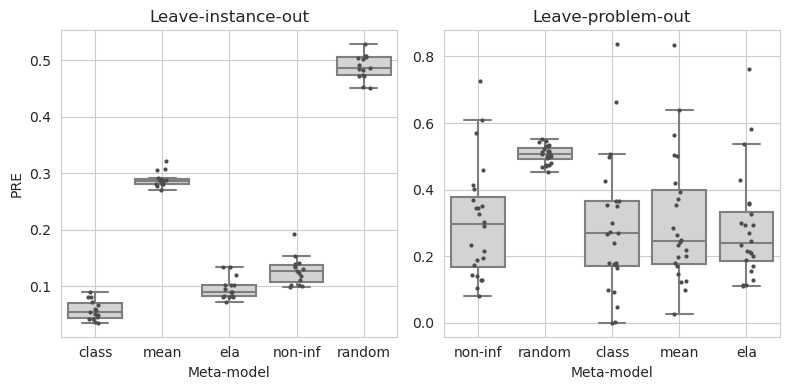

In [48]:
sns.set_style("whitegrid")
sns.set_palette("gray")

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

lio_data = df.filter(pl.col("mode") == "LIO").to_pandas()
sns.boxplot(data=lio_data, x="model", y="error", ax=axes[0], color="lightgray", showfliers=False, linewidth=1.5)
sns.stripplot(data=lio_data, x="model", y="error", size=3, color=".3", ax=axes[0])
axes[0].set_title('Leave-instance-out')
axes[0].set_xlabel('Meta-model')
axes[0].set_ylabel('PRE')
axes[0].grid(True)

lpo_data = df.filter(pl.col("mode") == "LPO").to_pandas()
sns.boxplot(data=lpo_data, x="model", y="error", ax=axes[1], color="lightgray", showfliers=False, linewidth=1.5)
sns.stripplot(data=lpo_data, x="model", y="error", size=3, color=".3", ax=axes[1])
axes[1].set_title('Leave-problem-out')
axes[1].set_xlabel('Meta-model')
axes[1].set_ylabel(None)
axes[1].grid(True)
plt.tight_layout()
#plt.subplots_adjust(wspace=0.03)

plt.savefig('figures/rank_errors.pdf', bbox_inches='tight', pad_inches=0)